In [18]:
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
"""
    This method draws the polygon taking the vertices, query point as input.
    points: A list of points
    query_point: A query point
"""
def draw_polygon(points, query_point):
    # I am doing this because plt.plot only joins consecutive points, and to form a closed polygon,
    #  you also need to connect the last point with first point. One trick is to append the first point to the points list.
    closed_points = points + [points[0]]  # closes the polygon
    x, y = zip(*closed_points)
    plt.plot(x, y, marker='o', color='blue')
    # Draw single query point that we will be testing to see if it is inside/outside
    plt.scatter(query_point[0], query_point[1], marker='x', color='red')
    plt.title("Polygon with Query Point")
    plt.show()



In [ ]:
def orientation(p, q, r):
    """Returns orientation of triplet (p, q, r): 
    0 = colinear, 1 = clockwise, 2 = counterclockwise"""
    val = (q[1] - p[1]) * (r[0] - q[0]) - \
          (q[0] - p[0]) * (r[1] - q[1])
    if abs(val) < 1e-10:
        return 0
    return 1 if val > 0 else 2

def on_segment(p, q, r):
    """Returns True if point q lies on segment pr (assumes colinear)"""
    return (min(p[0], r[0]) <= q[0] <= max(p[0], r[0]) and
            min(p[1], r[1]) <= q[1] <= max(p[1], r[1]))

def is_point_inside_polygon(polygon, point):
    n = len(polygon)
    
    # First check if point is on any edge
    for i in range(n):
        next_i = (i + 1) % n
        p1 = polygon[i]
        p2 = polygon[next_i]
        
        if orientation(p1, point, p2) == 0 and on_segment(p1, point, p2):
            return True  # On boundary
    
    # Ray casting algorithm
    count = 0
    INF = 1e9
    ray_end = (INF, point[1])
    
    for i in range(n):
        next_i = (i + 1) % n
        p1 = polygon[i]
        p2 = polygon[next_i]
        
        # Skip horizontal edges
        if p1[1] == p2[1]:
            continue
            
        # Only count if ray crosses edge (not just touches)
        # Count edge if point.y is strictly between vertices' y values
        if min(p1[1], p2[1]) < point[1] <= max(p1[1], p2[1]):
            # Calculate x-coordinate where edge crosses the ray
            x_intersect = p1[0] + (point[1] - p1[1]) * (p2[0] - p1[0]) / (p2[1] - p1[1])
            if x_intersect >= point[0]:
                count += 1
    
    return count % 2 == 1

Test Case 1: 


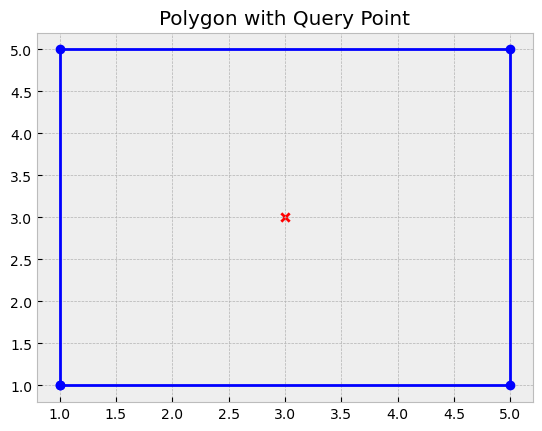

Expected: True, Got: True, Correct Answer
Test Case 2: 


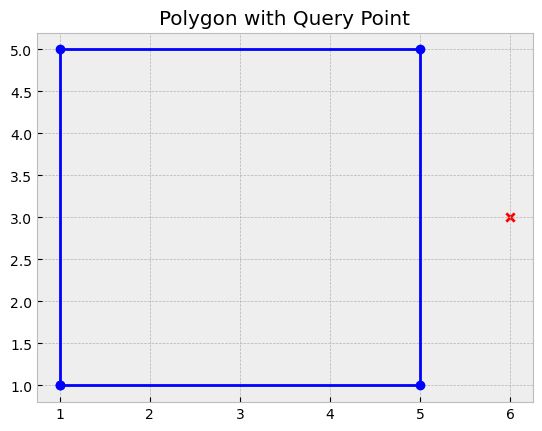

Expected: False, Got: False, Correct Answer
Test Case 3: 


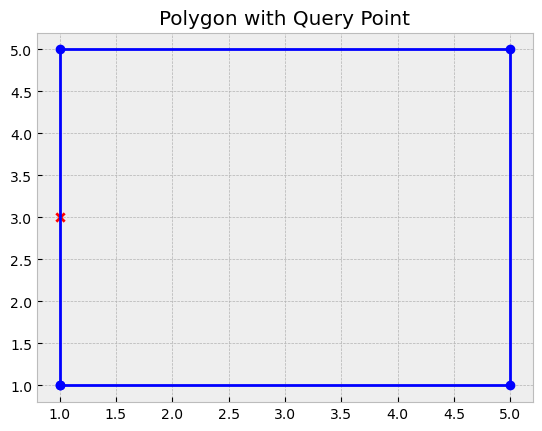

Expected: True, Got: True, Correct Answer
Test Case 4: 


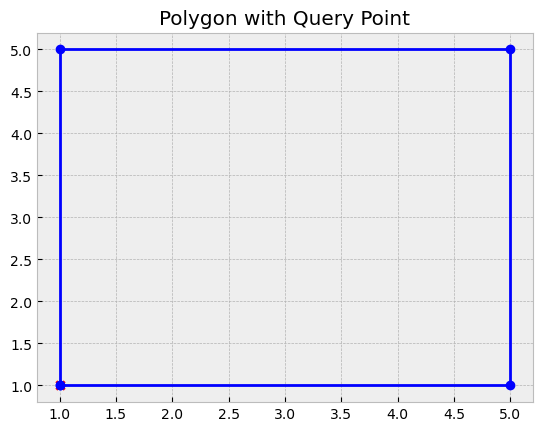

Expected: True, Got: True, Correct Answer
Test Case 5: 


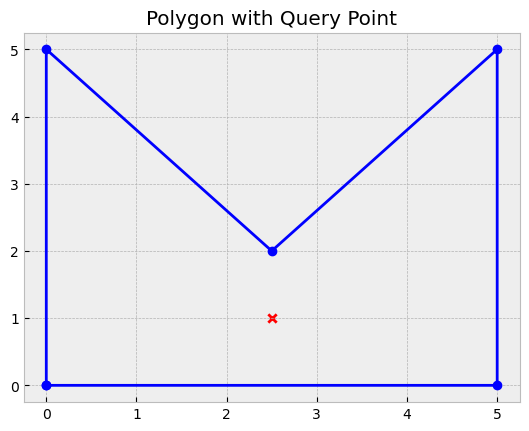

Expected: True, Got: True, Correct Answer
Test Case 6: 


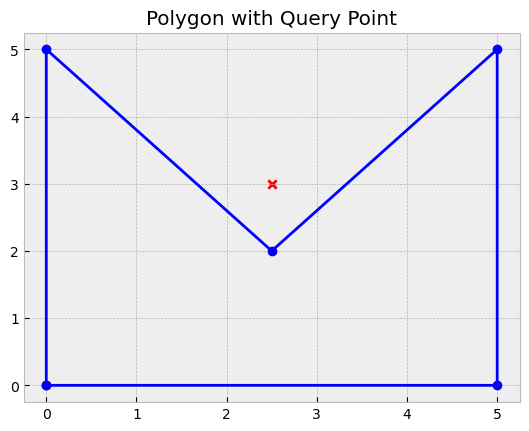

Expected: False, Got: False, Correct Answer
Test Case 7: 


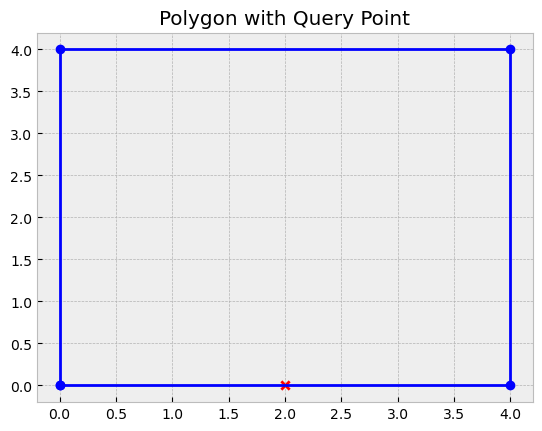

Expected: True, Got: True, Correct Answer
Test Case 8: 


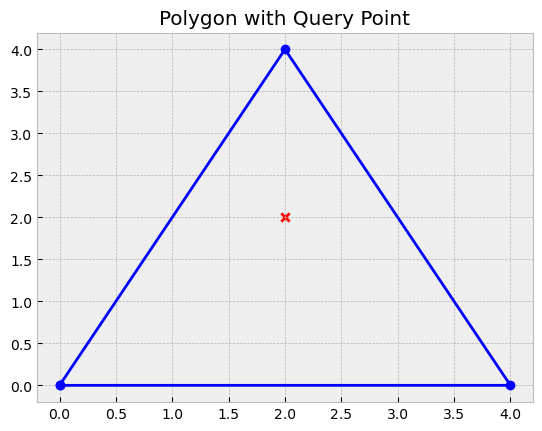

Expected: True, Got: True, Correct Answer
Test Case 9: 


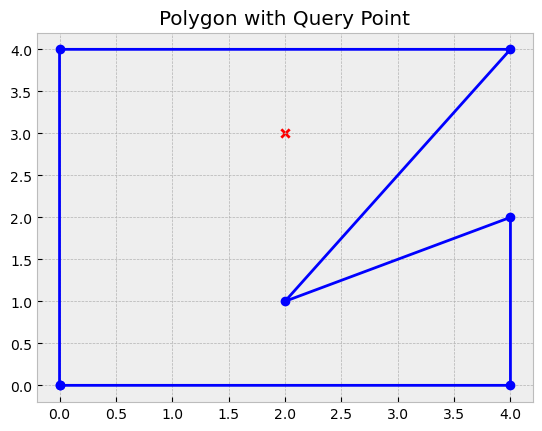

Expected: True, Got: True, Correct Answer
Test Case 10: 


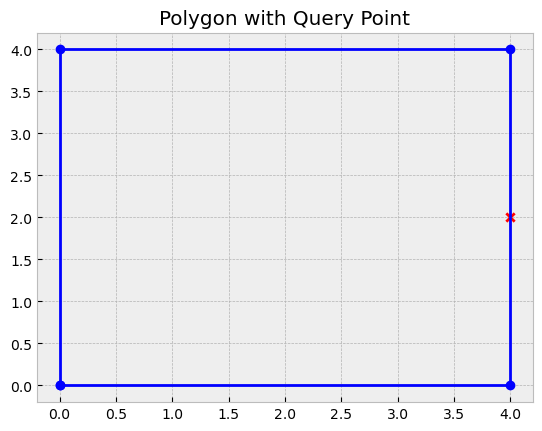

Expected: False, Got: False, Correct Answer


In [34]:

test_cases = [
    ([(1, 1), (5, 1), (5, 5), (1, 5)], (3, 3), True),       # Inside convex
    ([(1, 1), (5, 1), (5, 5), (1, 5)], (6, 3), False),      # Outside convex
    ([(1, 1), (5, 1), (5, 5), (1, 5)], (1, 3), True),       # On edge
    ([(1, 1), (5, 1), (5, 5), (1, 5)], (1, 1), True),       # On vertex
    ([(0, 0), (5, 0), (5, 5), (2.5, 2), (0, 5)], (2.5, 1), True),  # Inside concave
    ([(0, 0), (5, 0), (5, 5), (2.5, 2), (0, 5)], (2.5, 3), False), # In concave 
    ([(0, 0), (4, 0), (4, 4), (0, 4)], (2, 0), True),       # On horizontal edge
    ([(0, 0), (4, 0), (2, 4)], (2, 2), True),               # Inside triangle
    ([(0, 0), (4, 0), (4, 2), (2, 1), (4, 4), (0, 4)], (2, 3), True),  # zig zag
    ([(0, 0), (4, 0), (4, 4), (0, 4)], (4.000000001, 2), False), # Just outside
]

for i, (polygon, query_point, expected) in enumerate(test_cases, 1):
    print(f"Test Case {i}: ")
    draw_polygon(polygon, query_point=query_point)
    result = is_point_inside_polygon(polygon, query_point)
    print(f"Expected: {expected}, Got: {result}, {'Correct Answer' if result == expected else 'Wrong Answer'}")